In [24]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

path = "C:/Users/szyml/Downloads/chess+king+rook+vs+king/krkopt.data"
df = pd.read_csv(path, header=None)

df.columns = ["wk_col", "wk_row", "wr_col", "wr_row", "bk_col", "bk_row", "result"]

letter_to_num = {letter: i + 1 for i, letter in enumerate(string.ascii_lowercase)}
for col in ["wk_col", "wr_col", "bk_col"]:
    df[col] = df[col].map(letter_to_num)

df['dist_euk'] = np.sqrt((df['wk_col'] - df['bk_col'])**2 + (df['wk_row'] - df['bk_row'])**2)

df['dist_manh'] = (df['wk_col'] - df['bk_col']).abs() + (df['wk_row'] - df['bk_row']).abs()

df['dist_czeb'] = np.maximum((df['wk_col'] - df['bk_col']).abs(), 
                             (df['wk_row'] - df['bk_row']).abs())

df['bk_to_edge'] = np.minimum(
    np.minimum((df['bk_row'] - 1).abs(), (df['bk_row'] - 8).abs()),
    np.minimum((df['bk_col'] - 1).abs(), (df['bk_col'] - 8).abs())
)

## Zadanie 1 część pierwsza

Text(120.72222222222221, 0.5, 'wiersz czarnego króla')

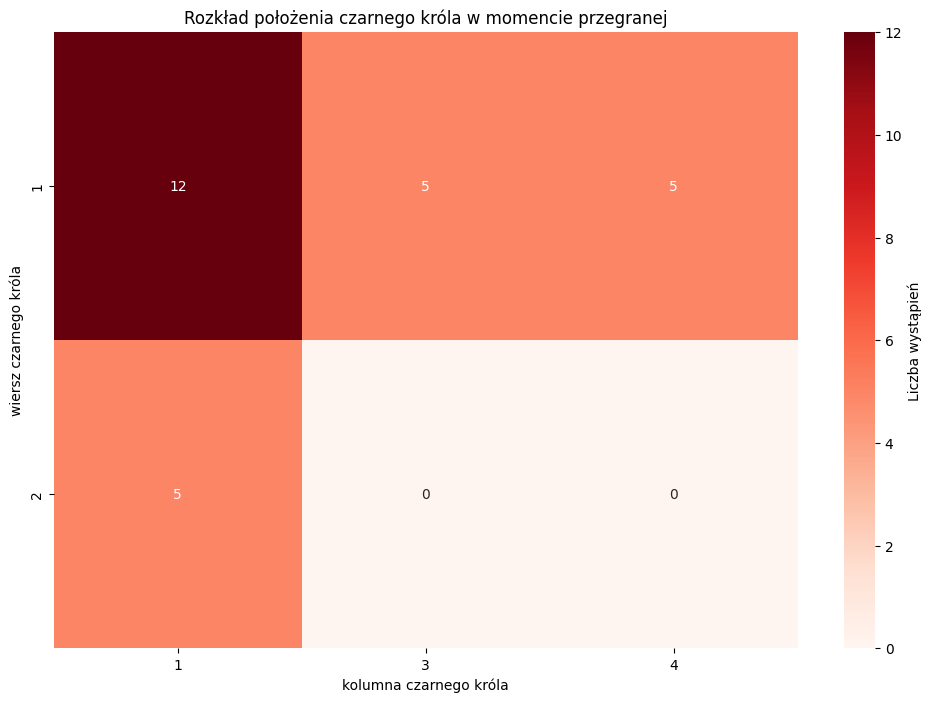

In [22]:
data_if_win=df[df['result']=='zero']

data_if_win=data_if_win[['bk_row','bk_col']]

data_if_win = data_if_win.groupby(['bk_row', 'bk_col']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(data_if_win, annot=True, fmt="d", cmap="Reds", cbar_kws={'label': 'Liczba wystąpień'})
plt.title("Rozkład położenia czarnego króla w momencie przegranej")
plt.xlabel("kolumna czarnego króla")
plt.ylabel("wiersz czarnego króla")

Jak widac z rozkładu czarny król znajduje się zawsze przy krawędzi planszy i również najczęściej w jednym z rogów. Czasami znajduje się również przy krawędzi jedngo boku i
oddalony o 1,2,3 pola od prostopadłej krawędzi. 

## Zadanie 1 część druga

Text(0.5, 1.0, 'Rozkład położenia czarnego króla w momencie remisu')

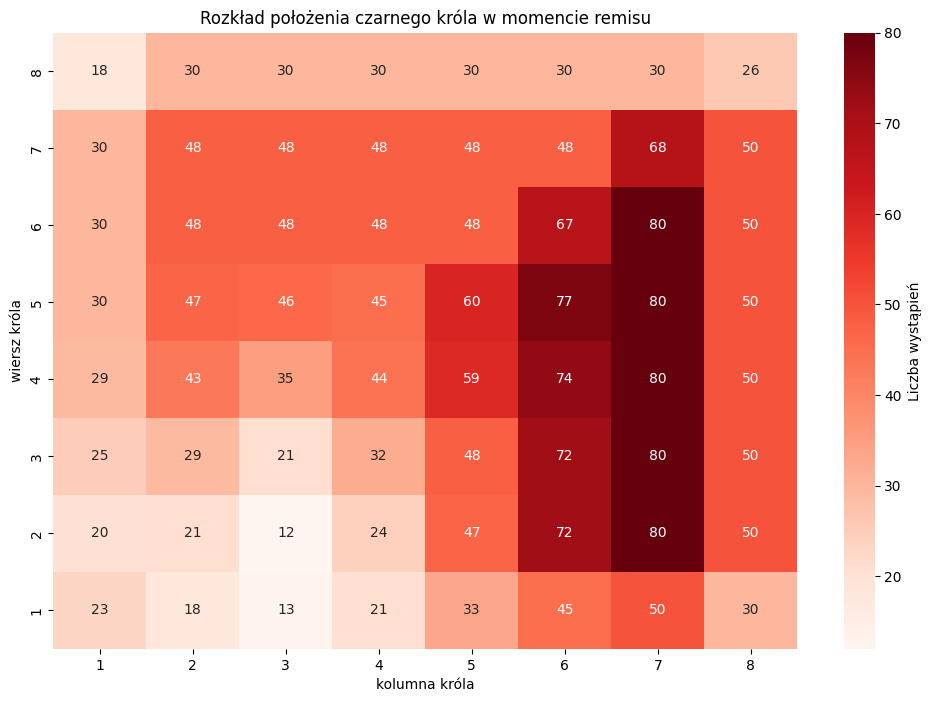

In [23]:
data_if_draw=df[df['result']=='draw']


data_if_draw=data_if_draw[['bk_row','bk_col']]


data_if_draw = data_if_draw.groupby(['bk_row', 'bk_col']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(data_if_draw, annot=True, fmt="d", cmap="Reds", cbar_kws={'label': 'Liczba wystąpień'})
plt.gca().invert_yaxis()
plt.xlabel('kolumna króla')
plt.ylabel('wiersz króla')
plt.title("Rozkład położenia czarnego króla w momencie remisu")

Z  Powyższego rozkłady możemy wywnioskować , że król może się wszędzie znajdować w przypadku remisu, jednakże najczęściej  jest oddalony o dokładnie jedną komórkę od jendej z krawędzi planszy i o minimum jedną komórkę od drugiej.

## Zadanie 2

C:\Users\szyml\AppData\Local\Temp\ipykernel_22276\1108328635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['moves_to_win'] = df_corr['result'].map(res_map)
C:\Users\szyml\AppData\Local\Temp\ipykernel_22276\1108328635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['dist_euk'] = df_corr['dist_euk'].round(0).astype(int)
C:\Users\szyml\AppData\Local\Temp\ipykernel_22276\1108328635.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

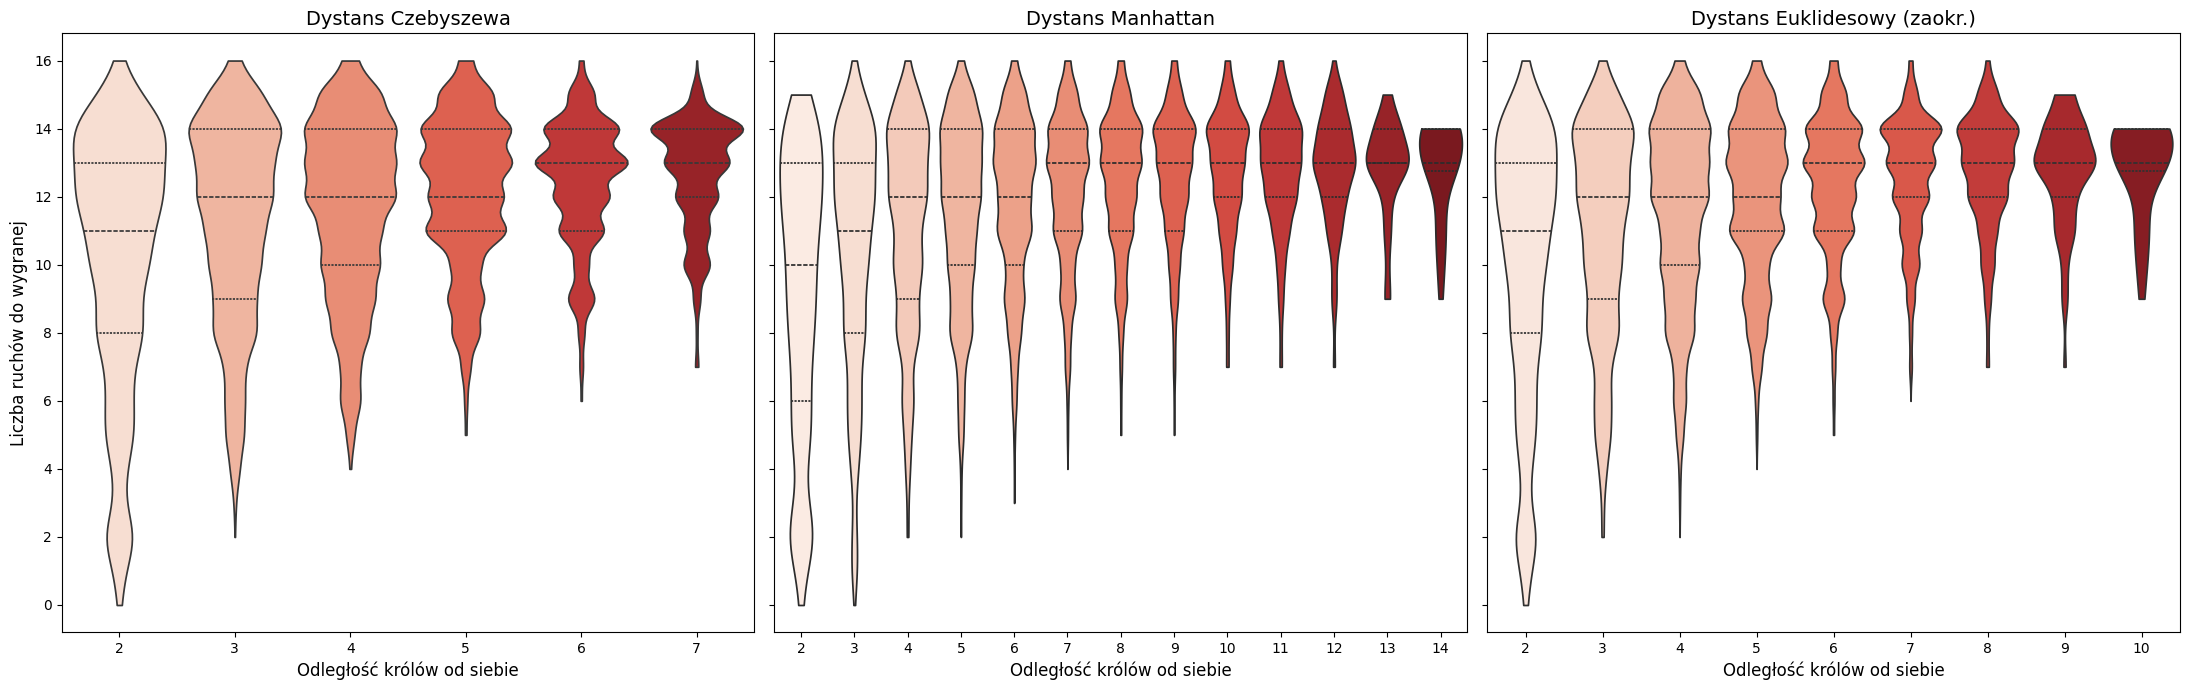

In [25]:

res_map = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11,
    'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16
}

df_corr = df[df['result'] != 'draw']
df_corr['moves_to_win'] = df_corr['result'].map(res_map)


df_corr['dist_euk'] = df_corr['dist_euk'].round(0).astype(int)


fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)

metrics = ['dist_czeb', 'dist_manh', 'dist_euk']
titles = ['Dystans Czebyszewa', 'Dystans Manhattan', 'Dystans Euklidesowy (zaokr.)']


for i, metric in enumerate(metrics):
    sns.violinplot(
        ax=axes[i], 
        x=metric, 
        y='moves_to_win', 
        data=df_corr, 
        palette='Reds', 
        inner='quartile', 
        cut=0             
    )
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('Odległość królów od siebie', fontsize=12)
    
    if i == 0:
        axes[i].set_ylabel('Liczba ruchów do wygranej', fontsize=12)
    else:
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Na podstawie powyższych wykresów , zależności odległości królów od siebie(w różnych metrykach) od liczby ruchów do wygranej , ciężko stwierdzić żeby jakaś metryka była bardziej przydatna od innych. Wszystkie z nich charakteryzują się dużym rozrzutem potrzebnych ruchów do wygranej w zależności od odległości królów od siebie.

## Zadanie 3 część pierwsza


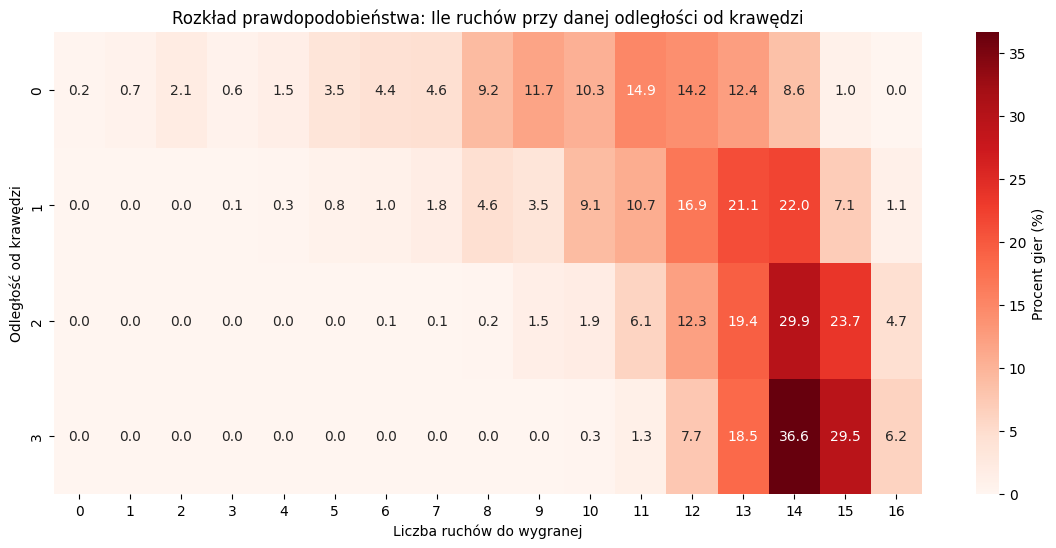

In [ ]:

pivot_counts = df_corr.groupby(['bk_to_edge', 'moves_to_win']).size().unstack(fill_value=0)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_pct, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Procent gier (%)'})
plt.title('Rozkład prawdopodobieństwa: Ile ruchów przy danej odległości od krawędzi')
plt.xlabel('Liczba ruchów do wygranej')
plt.ylabel('Odległość od krawędzi')
plt.show()

Na podstawie powyższje heatmapy widzimy, że odległość króla od krawędzi w pewnym  stopniu może nam pomóc w określeniu po ilu ruchach zakończy się gra. Widać , że tylko zerowa odległość krawędzi daje nam szanse na wmiarę szybkie zakończenie gry(w około 50% przypadkach gra się skończy w maksymalnie 10 ruchach), a przy odległości większej od zera w ponad 90% przypadkach gra się zakończy po ponad 10 ruchach. 

## Zadanie 3 cześć druga

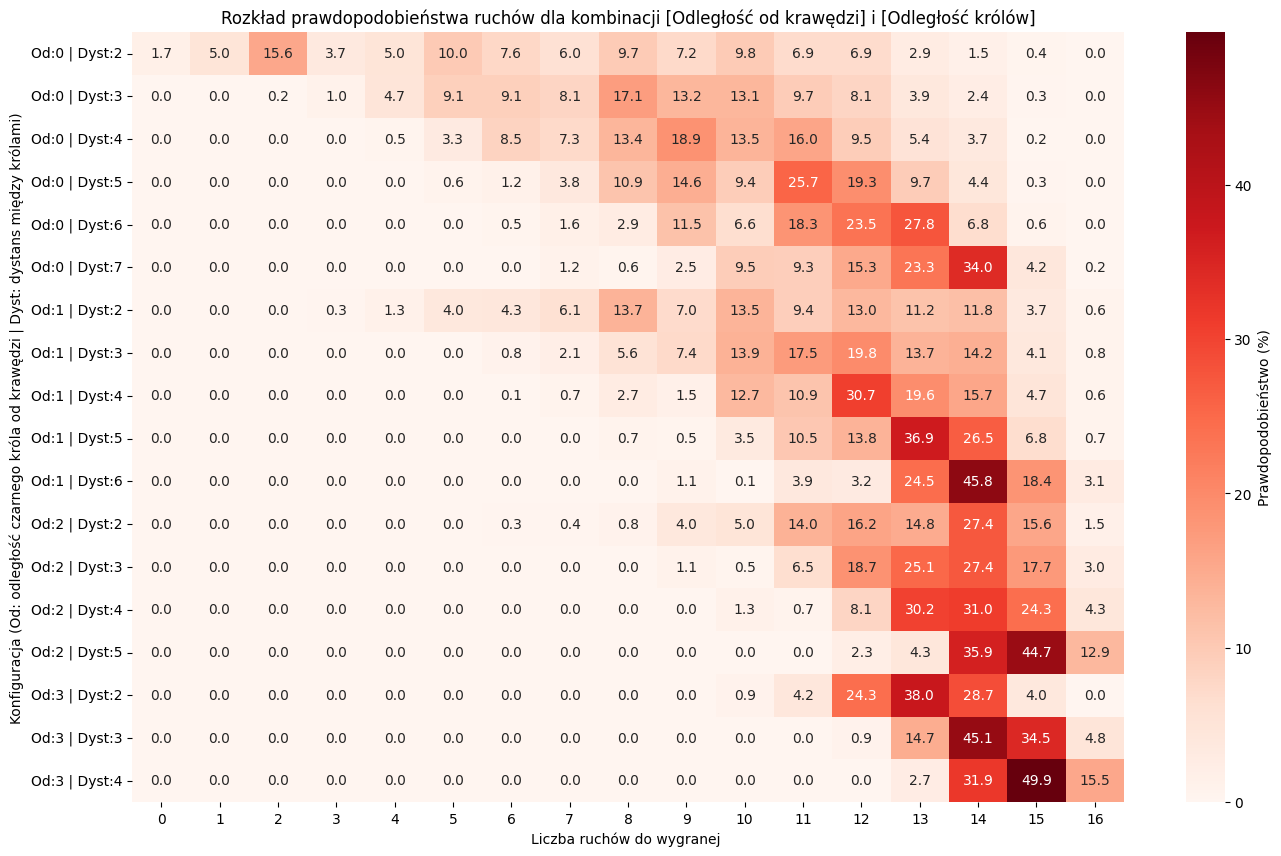

In [ ]:

df_corr['position_key'] = df_corr.apply(
    lambda x: f"Od:{int(x['bk_to_edge'])} | Dyst:{int(x['dist_czeb'])}", axis=1
)
pivot_counts = df_corr.groupby(['position_key', 'moves_to_win']).size().unstack(fill_value=0)

pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100
pivot_pct = pivot_pct.sort_index()
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot_pct, 
    annot=True, 
    fmt=".1f", 
    cmap="Reds", 
    cbar_kws={'label': 'Prawdopodobieństwo (%)'}
)

plt.title('Rozkład prawdopodobieństwa ruchów dla kombinacji [Odległość od krawędzi] i [Odległość królów]')
plt.xlabel('Liczba ruchów do wygranej ')
plt.ylabel('Konfiguracja (Od: odległość czarnego króla od krawędzi | Dyst: dystans między królami)')
plt.show()

Dzięki dodaniu informacji o odległości królów od siebie , możemy rozdzielić przypadki różnych odległości od krawędzi na poszczególne odległości królów od siebie. Widać , że w zależności od odległości królów, przewidywana liczba ruchów do wygrania gry, dla tej samej odległości od krawędzi, jest różna. Co oznacza , że nasza szacunkowa liczba ruchów do zakończenia gry, będzie lepsza, niż tylko w przypadku znajomości samej odleglości od krawędzi